In [3]:
import sys
from pathlib import Path

# Añade el directorio raíz del proyecto al sys.path
project_root = Path('../').resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [12]:
from src.processing.PreprocessingEducationalData import PreprocessingEducationalData
from src.models.StudentPerformanceAnalyzer import StudentPerformanceAnalyzer
import numpy as np
import pandas as pd

In [5]:
filename_processed = '../data/processed/StudentPerformanceFactors.csv'
df = pd.read_csv(filename_processed)
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Modelo de Regresión Mejorado - Información:
Tipo de modelo: elasticnet
Mejores parámetros: {'alpha': 0.001, 'l1_ratio': 0.1}

Métricas de Rendimiento:
R² Score: 0.7315
RMSE: 2.0426
R² medio en validación cruzada: 0.7212
Desviación estándar de R² en CV: 0.0776

Top 10 Características más Influyentes:
Attendance: 2.2925
Access_to_Resources_Low: 2.0297
Parental_Involvement_Low: 1.9918
Hours_Studied: 1.7686
Family_Income_Low: 1.1368
Motivation_Level_Low: 1.0941
Teacher_Quality_Low: 1.0347
Parental_Involvement_Medium: 1.0255
Peer_Influence_Positive: 1.0050
Access_to_Resources_Medium: 0.9986


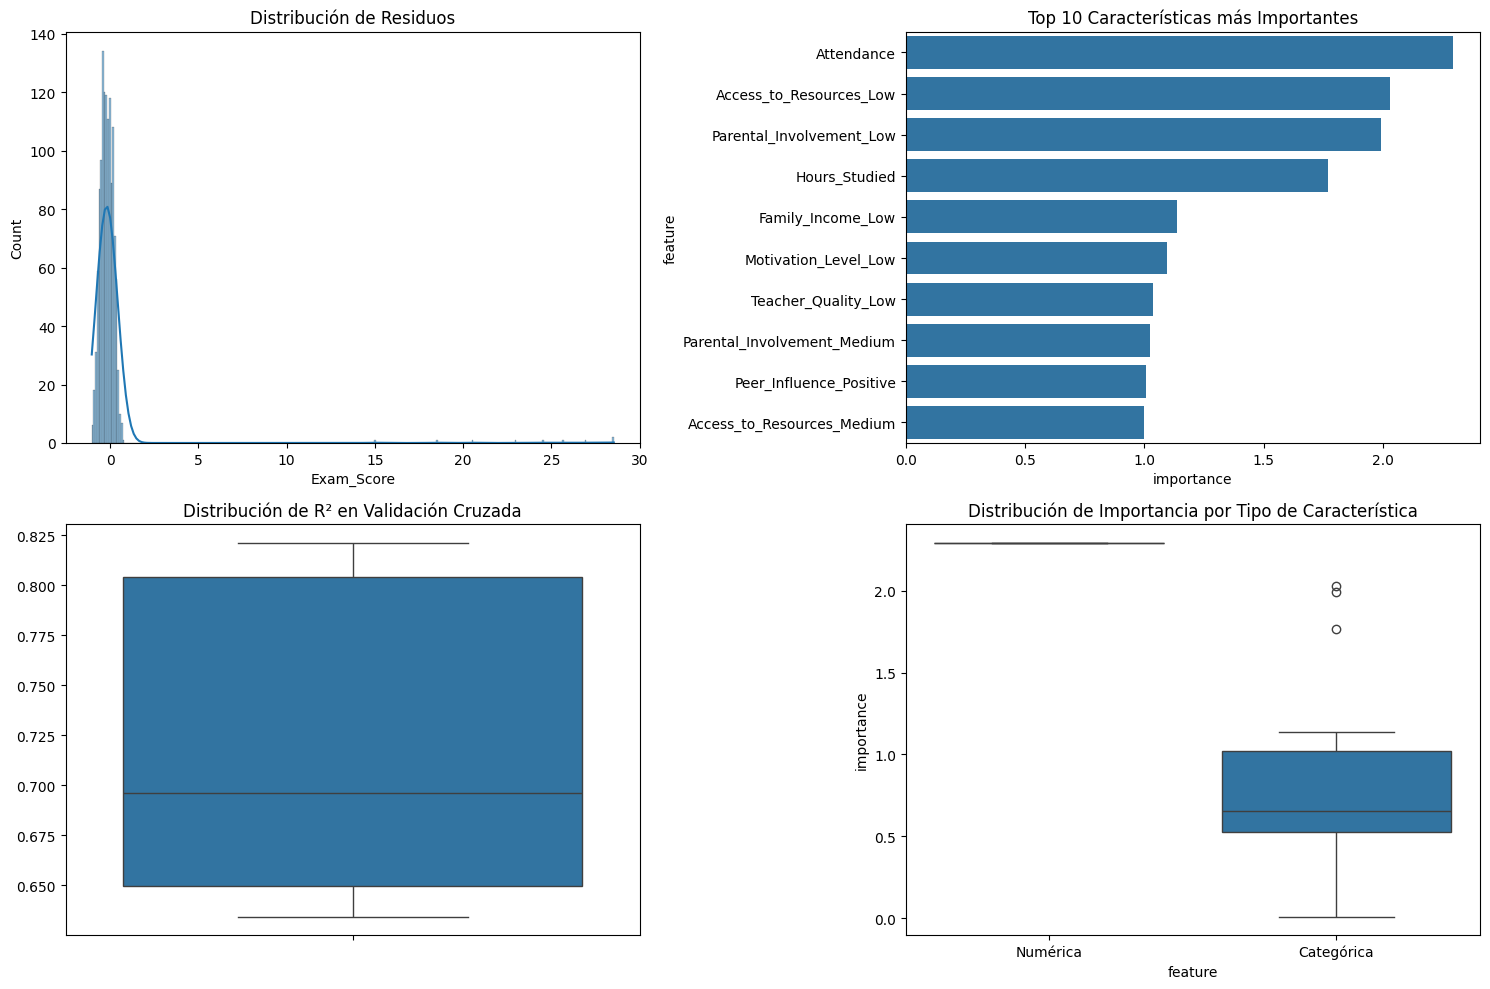

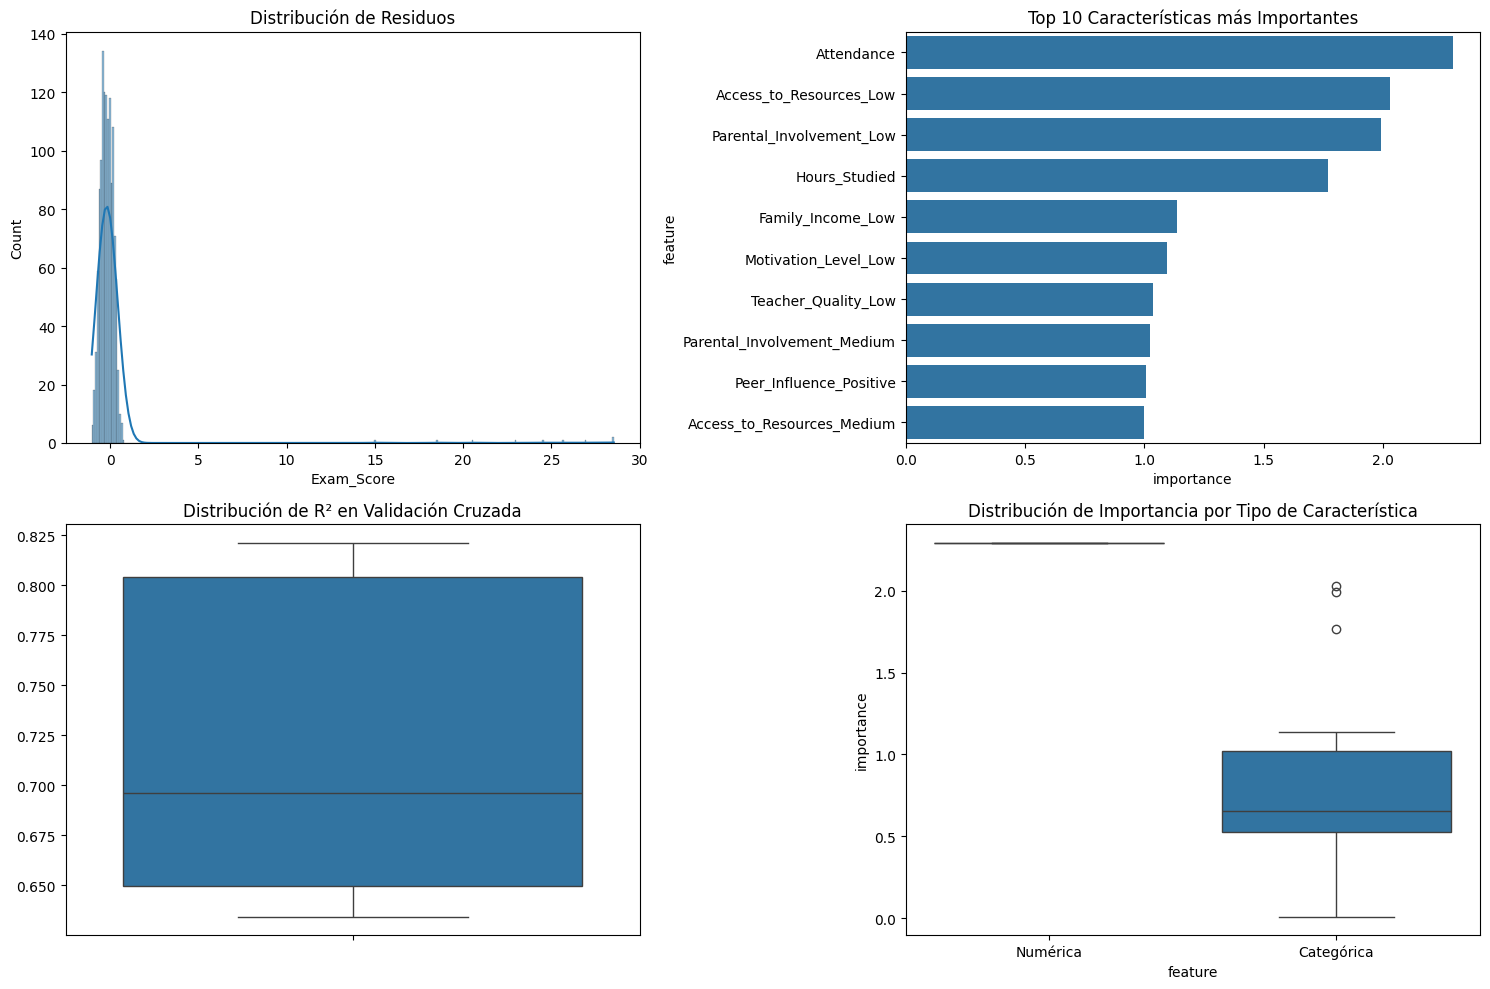

In [ ]:
preprocessor = PreprocessingEducationalData()
analyzer = StudentPerformanceAnalyzer(preprocessor)

report = analyzer.analyze_performance(df)

print("\nModelo de Regresión Mejorado - Información:")
print(f"Tipo de modelo: {report['model_info']['type']}")
print(f"Mejores parámetros: {report['model_info']['best_params']}")

print("\nMétricas de Rendimiento:")
print(f"R² Score: {report['model_performance']['r2_score']:.4f}")
print(f"RMSE: {report['model_performance']['rmse']:.4f}")
print(f"R² medio en validación cruzada: {report['model_performance']['cv_mean_r2']:.4f}")
print(f"Desviación estándar de R² en CV: {report['model_performance']['cv_std_r2']:.4f}")

print("\nTop 10 Características más Influyentes:")
for feature in report['top_features']:
    print(f"{feature['feature']}: {feature['importance']:.4f}")

# Generar gráficos de diagnóstico
analyzer.plot_diagnostics()